In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import nltk
import re

In [15]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [16]:
from wordcloud import WordCloud

In [17]:
df=pd.read_csv('train.csv',encoding='Latin-1')

In [18]:
df.head(20)

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
5,6,0,or i just worry too much?
6,7,1,Juuuuuuuuuuuuuuuuussssst Chillin!!
7,8,0,Sunny Again Work Tomorrow :-| ...
8,9,1,handed in my uniform today . i miss you ...
9,10,1,hmmmm.... i wonder how she my number @-)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [20]:
df.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

### Prepocessing the sentiment text

In [22]:
wordnet=WordNetLemmatizer()
stemmer=PorterStemmer()

In [23]:
def change_text(a):
    a=str(a)
    text=re.sub('[^a-zA-Z]',' ',a)
    text=text.lower()
    text=nltk.word_tokenize(text)
    text=[wordnet.lemmatize(word) for word in text if word not in stopwords.words('english')]
    text=' '.join(text)
    return text

In [24]:
df['SentimentText']=df['SentimentText'].apply(change_text)

In [25]:
df.drop('ItemID',axis=1,inplace=True)

In [26]:
df.head()

,Sentiment,SentimentText
0,0,sad apl friend
1,0,missed new moon trailer
2,1,omg already
3,0,omgaga im sooo im gunna cry dentist since supo...
4,0,think mi bf cheating


In [27]:
df['Sentiment'].value_counts()

Sentiment
1    56457
0    43532
Name: count, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

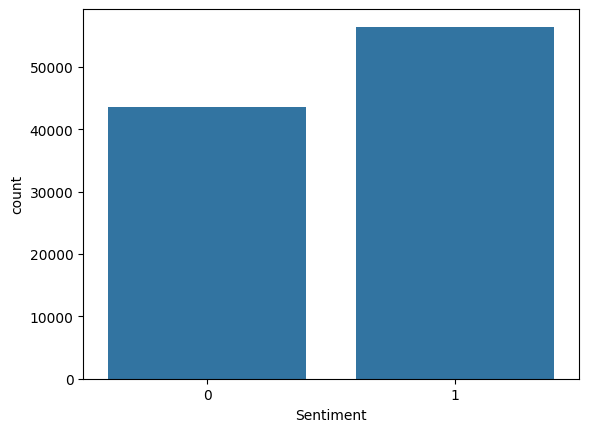

In [34]:
sns.countplot(x='Sentiment',data=df)

### EDA

#### Words of Positive Sentiments

In [35]:
word=''
for i in df.index:
    if df['Sentiment'][i]==1:
        word=word+df['SentimentText'][i]
word=word.upper()

In [36]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = 'none', 
                min_font_size = 10).generate(word) 

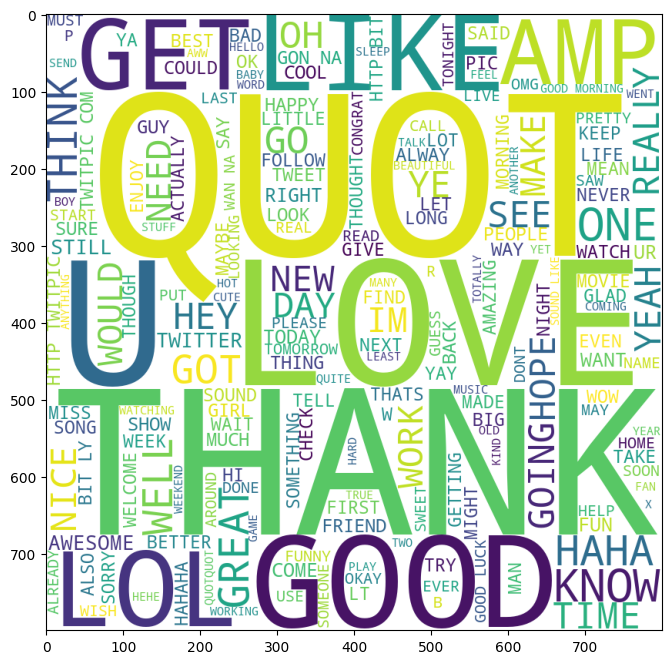

In [37]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 

#### Words with Negative Sentiments

In [38]:
word=''
for i in df.index:
    if df['Sentiment'][i]==0:
        word=word+df['SentimentText'][i]
word=word.upper()

In [39]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = 'none', 
                min_font_size = 10).generate(word) 

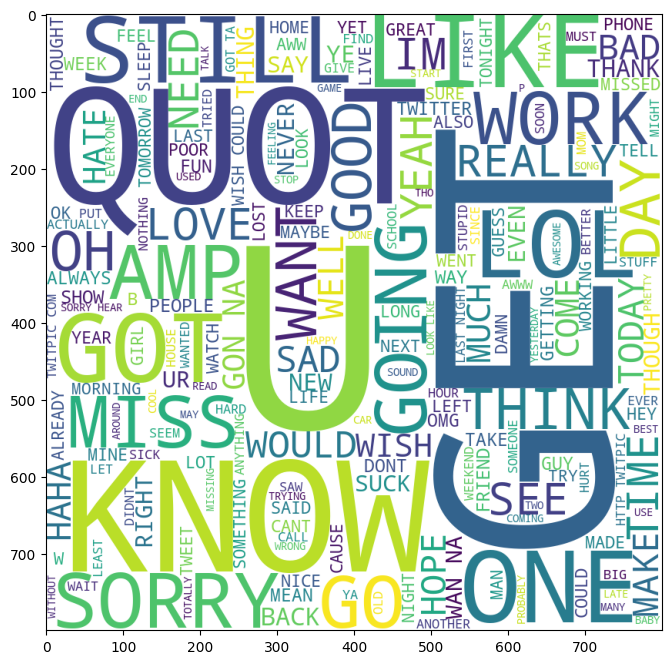

In [40]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 

### Converting Text to matrix

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
x=df['SentimentText']
x

0                                           sad apl friend
1                                  missed new moon trailer
2                                              omg already
3        omgaga im sooo im gunna cry dentist since supo...
4                                     think mi bf cheating
                               ...                        
99984    cupcake seems like repeating problem hope able...
99985    cupcake arrrr replied different tweet time see...
99986                                   cupcake ya thought
99987                      cupcake dollie yes yes glad fun
99988                               cupcake kayla haha yes
Name: SentimentText, Length: 99989, dtype: object

In [47]:
y=df['Sentiment']
y

0        0
1        0
2        1
3        0
4        0
        ..
99984    0
99985    1
99986    0
99987    1
99988    1
Name: Sentiment, Length: 99989, dtype: int64

In [48]:
tf=TfidfVectorizer()

In [49]:
X=tf.fit_transform(x)

In [50]:
cf=CountVectorizer()

In [51]:
X1=cf.fit_transform(x)

### Applying ML Algorithms

In [52]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [54]:
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=42)

In [55]:
print(cross_val_score(MultinomialNB(),X1,y,cv=cv,scoring='accuracy'))

[0.74190752 0.74057406 0.74000733 0.73974064 0.73750708 0.74364103
 0.74014068 0.73690702 0.74150748 0.73790712]


In [56]:
print(cross_val_score(MultinomialNB(),X1,y,cv=cv,scoring='accuracy').mean())

0.73998399839984


In [57]:
x_train,x_test,y_train,y_test=train_test_split(X1,y,test_size=0.3,random_state=42)

In [58]:
nb=MultinomialNB()

In [59]:
nb.fit(x_train,y_train)

MultinomialNB()

In [60]:
prediction=nb.predict(x_test)

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [62]:
confusion_matrix(y_test,prediction)

array([[ 9033,  4154],
       [ 3588, 13222]], dtype=int64)

In [63]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.72      0.68      0.70     13187
           1       0.76      0.79      0.77     16810

    accuracy                           0.74     29997
   macro avg       0.74      0.74      0.74     29997
weighted avg       0.74      0.74      0.74     29997



In [64]:
def predict(message):
    if nb.predict(cf.transform([change_text(message)])):
        return 'Positive'
    else:
        return 'Negavite'

In [65]:
x='@ifahmi yeah, I think I will do the same thing. '
predict(x)

'Positive'